In [18]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

folder = '../../Gridsearch_200820'

csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        filename = file.split("_")
        # print(filename[0][-2:].isdigit())
        if filename[0][-2:].isdigit(): df['exp'] = filename[0][-2:]
        else: df['exp'] = filename[0][-1]
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Total number of Nans: 0


In [19]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [20]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [21]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [22]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [23]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index
count,3408.000000,3408.0,3408.000000,3408.0,3.408000e+03,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000
mean,30.028756,64.0,0.002103,32.0,1.000000e-04,0.040927,1.154343,0.711830,86.911538,0.714286,116.269325,30.525235
std,20.379329,0.0,0.002987,0.0,2.710903e-20,0.040242,0.954008,0.101707,79.035609,0.108416,221.639860,19.218911
min,0.000000,64.0,0.000100,32.0,1.000000e-04,0.000000,0.000000,0.485577,2.071014,0.488315,2.075855,0.000000
25%,13.000000,64.0,0.000500,32.0,1.000000e-04,0.000000,0.000000,0.586564,10.551657,0.581981,11.024189,14.000000
50%,27.000000,64.0,0.001000,32.0,1.000000e-04,0.050000,1.000000,0.761619,81.863228,0.765491,83.293201,27.000000
75%,46.000000,64.0,0.001000,32.0,1.000000e-04,0.100000,2.000000,0.793870,119.611252,0.801749,125.795086,48.000000
max,99.000000,64.0,0.010000,32.0,1.000000e-04,0.100000,3.000000,0.837440,1399.484985,0.851763,2463.032227,64.000000


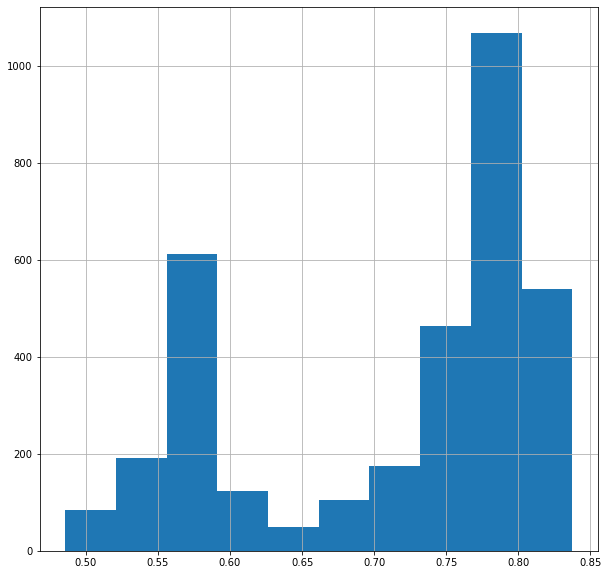

In [24]:
big_df['val_acc'].hist(figsize=(10, 10))

In [25]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'val_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'val_acc'].argmax()].to_dict())

In [26]:
best_df = pd.DataFrame(best_rows)
best_df = best_df.drop(columns= ["learning_rate", "hidden_units", "batch_size", "early_stopping"])

In [27]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


Dataframe with all best epochs for Validation accuracy


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index,exp
41,7,0.0100,0.01,2,0.550180,3.058193,0.543803,3.508614,41,3
42,7,0.0100,0.01,3,0.572316,4.412059,0.555756,4.506811,42,3
54,8,0.0050,0.01,1,0.579928,5.149339,0.573918,5.083934,54,7
56,8,0.0050,0.01,3,0.584635,5.177985,0.578058,5.116587,56,7
39,8,0.0100,0.01,0,0.576122,4.538862,0.563101,4.478766,39,3
...,...,...,...,...,...,...,...,...,...,...
13,69,0.0005,0.10,1,0.822817,125.756813,0.832399,125.536324,13,13
23,69,0.0001,0.00,2,0.819311,153.863983,0.825721,147.729172,23,16
59,69,0.0010,0.00,2,0.799279,86.735474,0.797209,80.986115,59,8
29,69,0.0001,0.05,2,0.833734,199.023239,0.840077,193.481171,29,18


In [28]:
print("Dataframe with one per trials")
# mean_df = best_df.groupby(by=["cost_per_sample", "surprisal_cost"])
sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="val_acc")
sorted.first()

Dataframe with one per trials


epoch  trial   val_acc  val_updates  \
cost_per_sample surprisal_cost                                        
0.0001          0.00               66      0  0.822516   169.830124   
                0.01               66      0  0.828626   174.433701   
                0.05               68      0  0.829227   176.217255   
                0.10               68      0  0.837440   268.162048   
0.0005          0.00               68      0  0.818810   109.082130   
                0.01               62      0  0.810897    98.120689   
                0.05               67      0  0.816206   113.549782   
                0.10               68      0  0.823518   125.470650   
0.0010          0.00               61      0  0.798177    82.785759   
                0.01               41      0  0.783253    80.605766   
                0.05               50      0  0.797776    95.505211   
                0.10               46      0  0.801683    88.875198   
0.0050          0.00               25      0  0.588141     4.860777   
                0.01               20      0  0.584635     4.340545   
                0.05               25      0  0.592348     5.376202   
                0.10               65      0  0.693610    22.499899   
0.0100          0.00               26      0  0.565204     2.446815   
                0.01                8      0  0.576122     4.538862   
                0.05               15      0  0.611979     9.174880   
                0.10               12      0  0.582632     4.522636   

                                train_acc  train_updates  list_index exp  
cost_per_sample surprisal_cost                                            
0.0001          0.00             0.829728     156.198318          21  16  
                0.01             0.836071     165.067047          30  19  
                0.05             0.839543     179.624329          27  18  
                0.10             0.851095     266.561218          24  17  
0.0005          0.00             0.816907     100.923012           9  12  
                0.01             0.818710     102.735046          18  15  
                0.05             0.823518     112.927414          15  14  
                0.10             0.831931     124.608574          12  13  
0.0010          0.00             0.796207      78.590141          57   8  
                0.01             0.780582      76.936165           6  11  
                0.05             0.789997      85.887085           3  10  
                0.10             0.796608      89.552017          61   9  
0.0050          0.00             0.577991       4.669471          43   4  
                0.01             0.573985       4.385684          53   7  
                0.05             0.586939       5.594618          49   6  
                0.10             0.698785      22.185431          46   5  
0.0100          0.00             0.553753       2.413862           0   0  
                0.01             0.563101       4.478766          39   3  
                0.05             0.604567       8.782385          36   2  
                0.10             0.569645       4.452658          33   1

In [29]:
# mean_df = mean_df.max()
# mean_df.sort_values(by='val_acc')
sorted['val_acc'].describe()

count      mean       std       min       25%  \
cost_per_sample surprisal_cost                                                  
0.0001          0.00              3.0  0.822149  0.002673  0.819311  0.820913   
                0.01              3.0  0.827691  0.003209  0.824119  0.826372   
                0.05              3.0  0.832666  0.003048  0.829227  0.831480   
                0.10              3.0  0.832565  0.004481  0.828626  0.830128   
0.0005          0.00              3.0  0.809729  0.007989  0.803786  0.805188   
                0.01              3.0  0.807759  0.006596  0.800180  0.805539   
                0.05              3.0  0.810630  0.012721  0.796074  0.806140   
                0.10              3.0  0.823885  0.001292  0.822817  0.823167   
0.0010          0.00              4.0  0.800556  0.009490  0.791066  0.796399   
                0.01              3.0  0.793603  0.009008  0.783253  0.790565   
                0.05              3.0  0.799412  0.004014  0.796474  0.797125   
                0.10              4.0  0.806040  0.005164  0.801683  0.803410   
0.0050          0.00              3.0  0.587974  0.002358  0.585537  0.586839   
                0.01              4.0  0.584210  0.003187  0.579928  0.583459   
                0.05              4.0  0.612205  0.052941  0.577925  0.585061   
                0.10              3.0  0.623665  0.060606  0.586739  0.588692   
0.0100          0.00              3.0  0.564470  0.004651  0.559495  0.562350   
                0.01              4.0  0.576873  0.024207  0.550180  0.566782   
                0.05              3.0  0.586972  0.023477  0.565405  0.574469   
                0.10              3.0  0.577190  0.005563  0.571514  0.574469   

                                     50%       75%       max  
cost_per_sample surprisal_cost                                
0.0001          0.00            0.822516  0.823568  0.824619  
                0.01            0.828626  0.829477  0.830329  
                0.05            0.833734  0.834385  0.835036  
                0.10            0.831631  0.834535  0.837440  
0.0005          0.00            0.806591  0.812700  0.818810  
                0.01            0.810897  0.811548  0.812200  
                0.05            0.816206  0.817909  0.819611  
                0.10            0.823518  0.824419  0.825321  
0.0010          0.00            0.798728  0.802885  0.813702  
                0.01            0.797877  0.798778  0.799679  
                0.05            0.797776  0.800881  0.803986  
                0.10            0.804487  0.807116  0.813502  
0.0050          0.00            0.588141  0.589193  0.590244  
                0.01            0.584635  0.585387  0.587640  
                0.05            0.589894  0.617037  0.691106  
                0.10            0.590645  0.642127  0.693610  
0.0100          0.00            0.565204  0.566957  0.568710  
                0.01            0.574219  0.584310  0.608874  
                0.05            0.583534  0.597756  0.611979  
                0.10            0.577424  0.580028  0.582632

In [35]:
lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 fi

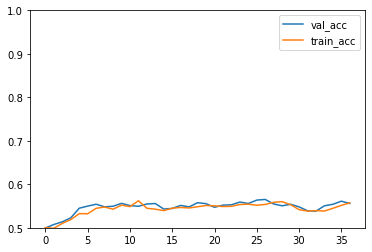

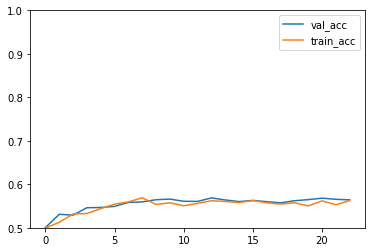

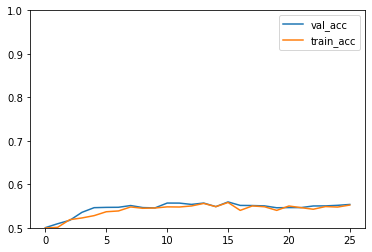

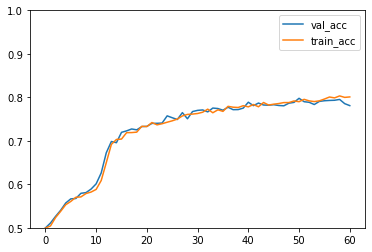

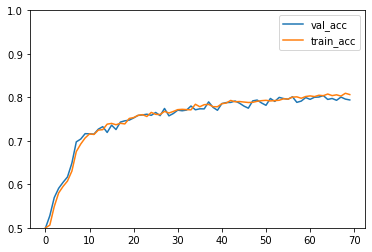

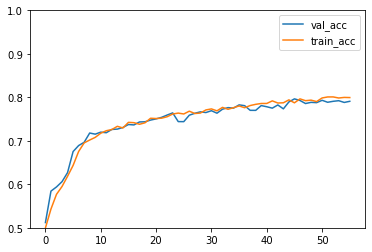

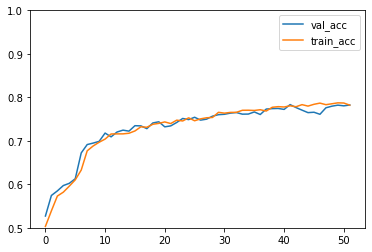

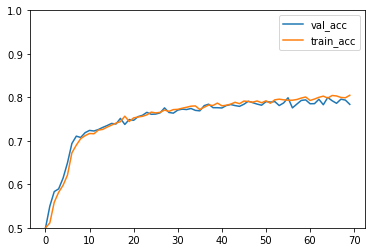

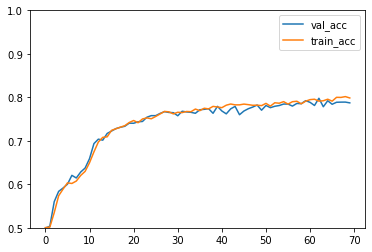

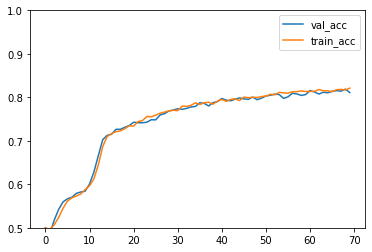

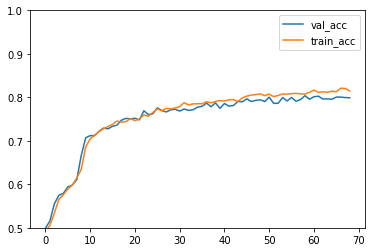

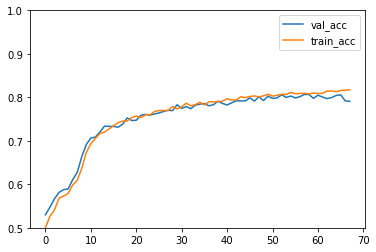

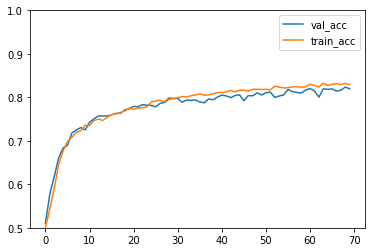

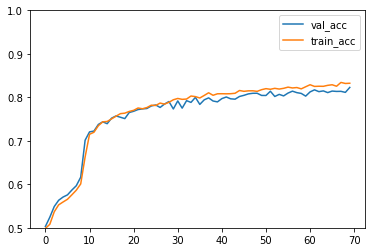

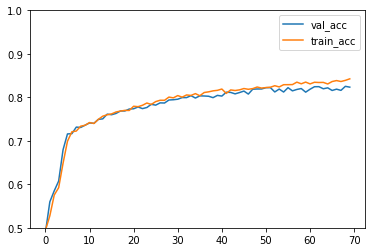

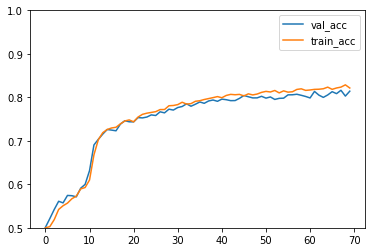

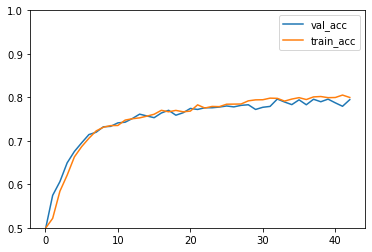

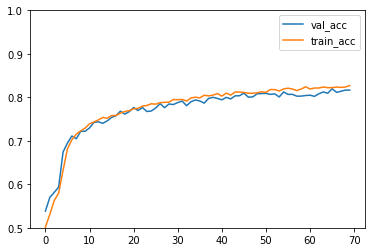

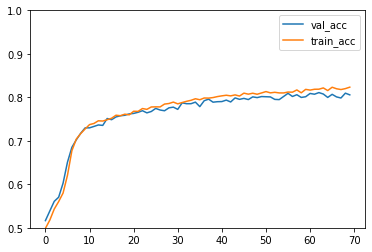

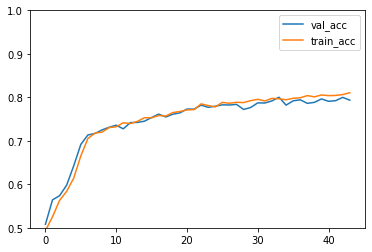

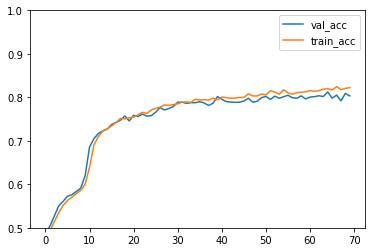

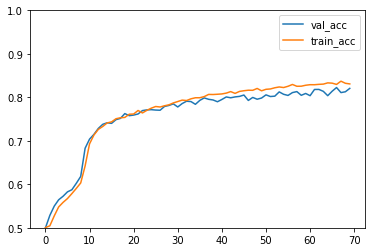

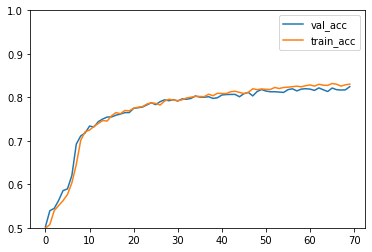

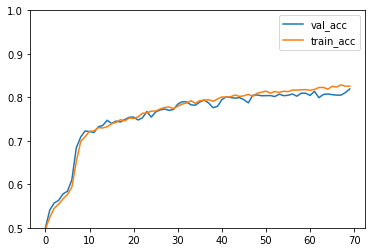

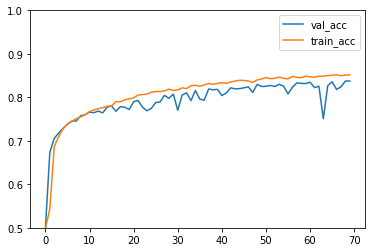

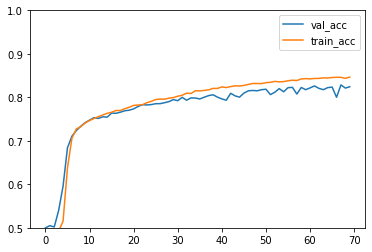

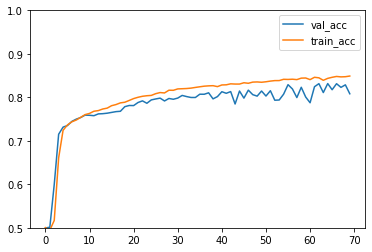

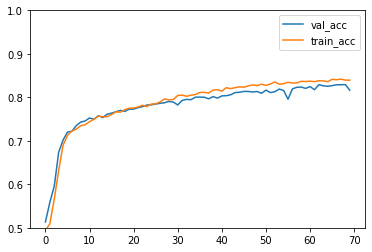

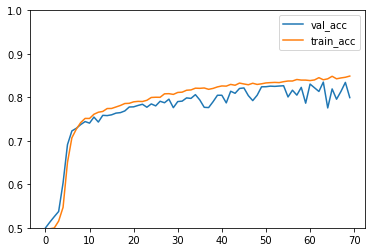

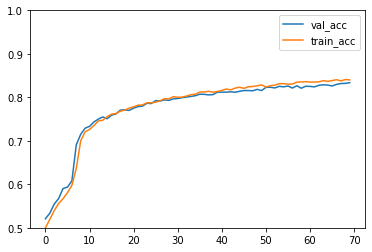

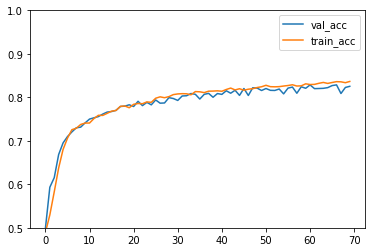

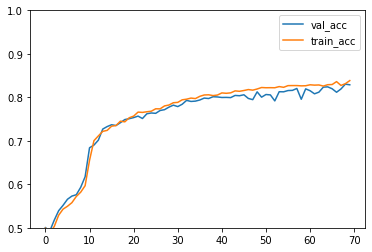

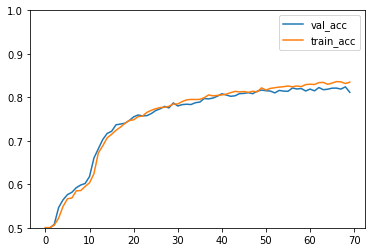

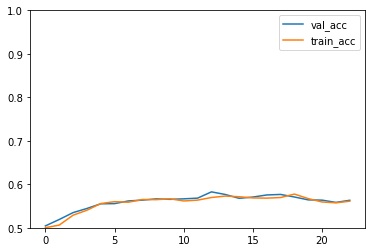

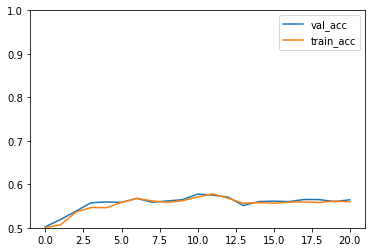

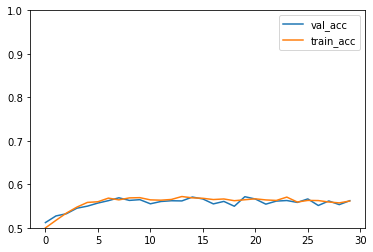

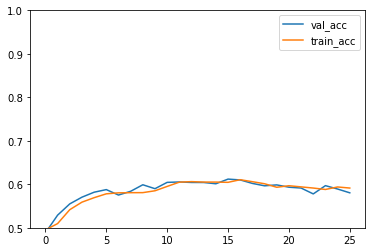

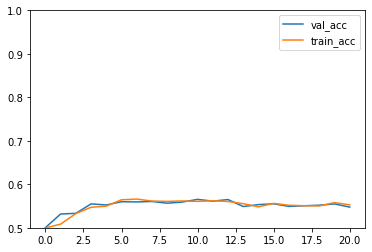

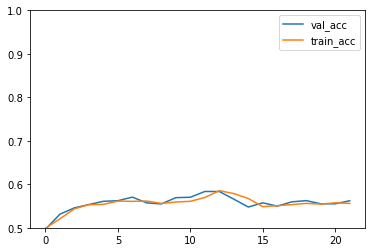

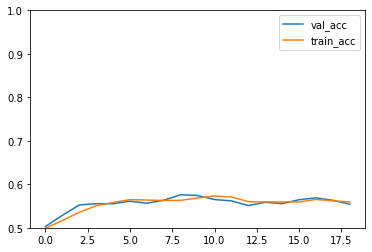

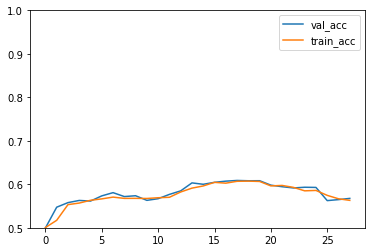

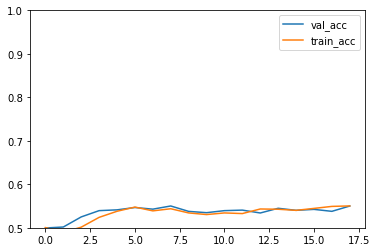

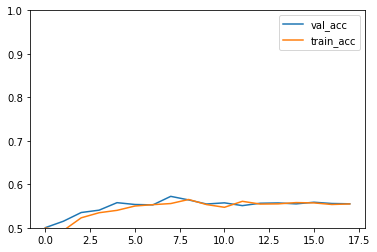

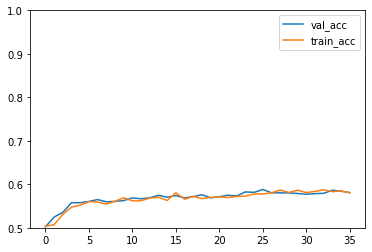

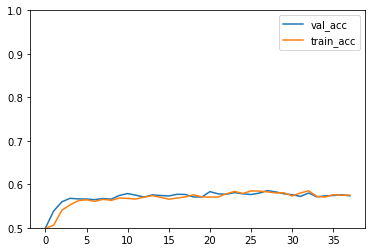

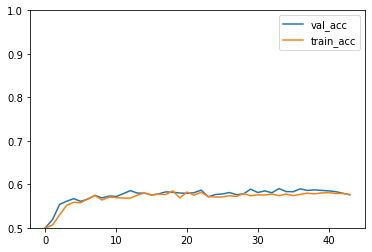

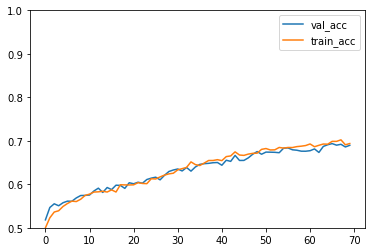

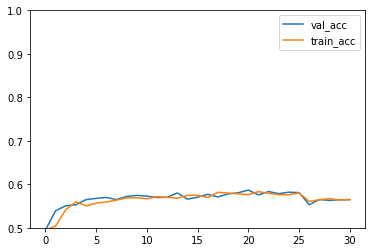

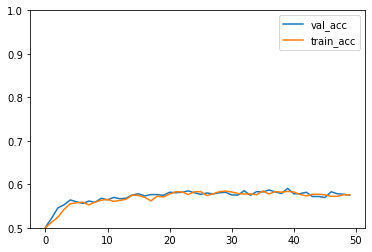

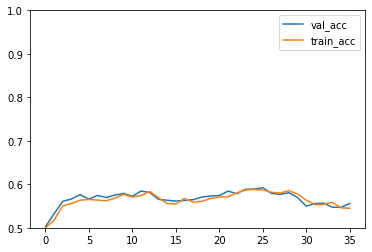

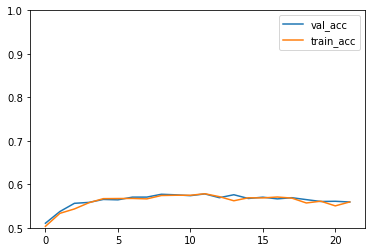

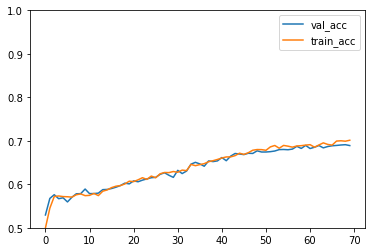

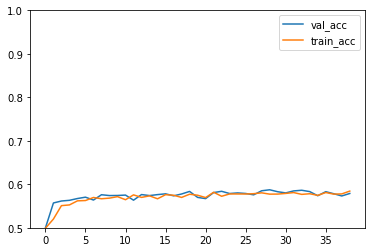

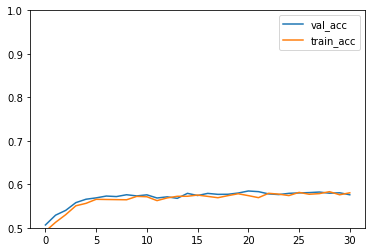

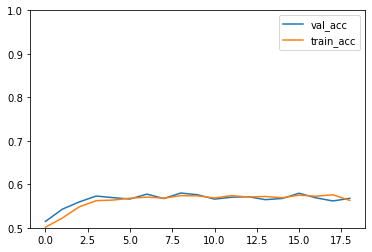

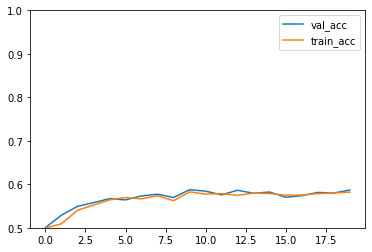

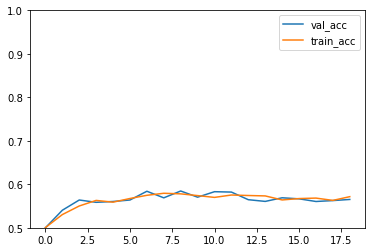

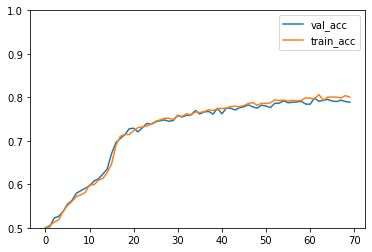

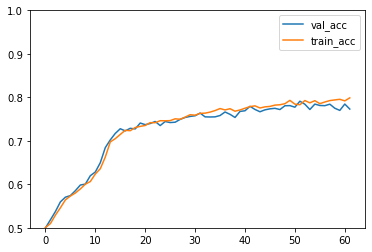

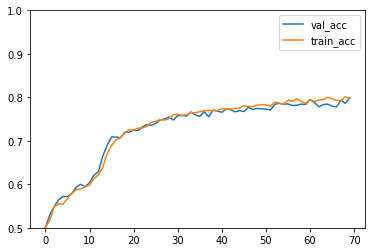

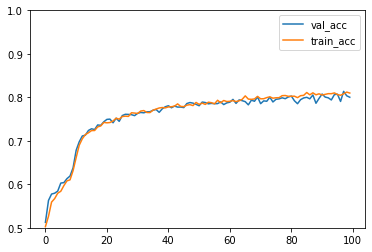

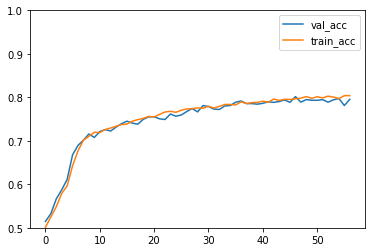

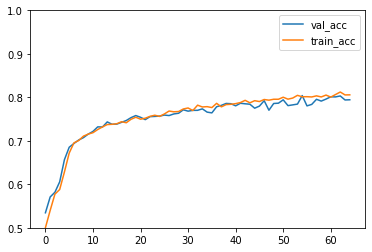

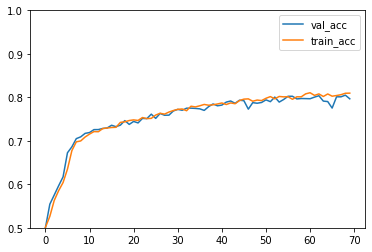

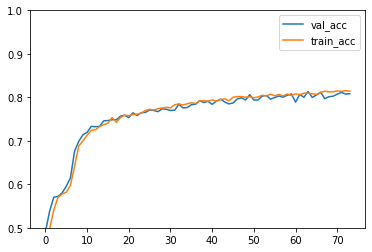

In [31]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    ax = df[['val_acc', 'train_acc']].plot()
    ax.set_ylim(0.5, 1)
    ax.get_figure().savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_cps{csvs[i].cost_per_sample[0]}_s{csvs[i].surprisal_cost[0]}_exp{csvs[i].exp[0]}.png")

In [32]:
# if not os.path.exists(f"{folder}/lrplots"):
#     os.makedirs(f"{folder}/lrplots")
#
# for i, df in enumerate(lr0001):
#     df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")
#

In [37]:
best_hyper = pd.concat(lr0001)

best_hyper_diff = best_hyper['val_acc'].diff(15)
best_hyper_diff.abs().mean()


0.05807438084253403

In [34]:
csvs[11]

best_df.sort_values(by='val_acc')

,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index,exp
41,7,0.0100,0.01,2,0.550180,3.058193,0.543803,3.508614,41,3
2,15,0.0100,0.00,2,0.559495,3.964643,0.558226,4.018296,2,0
0,26,0.0100,0.00,0,0.565204,2.446815,0.553753,2.413862,0,0
37,10,0.0100,0.05,1,0.565405,4.142528,0.560764,4.156717,37,2
1,12,0.0100,0.00,1,0.568710,5.569712,0.562233,5.597957,1,0
...,...,...,...,...,...,...,...,...,...,...
31,68,0.0001,0.01,1,0.830329,167.854065,0.831397,153.933029,31,19
26,64,0.0001,0.10,2,0.831631,264.345245,0.843616,264.864380,26,17
29,69,0.0001,0.05,2,0.833734,199.023239,0.840077,193.481171,29,18
28,63,0.0001,0.05,1,0.835036,227.149536,0.840411,228.683762,28,18
